In [1]:
!export PYTHONPATH="${PYTHONPATH}:`pwd`"



In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
import pickle as pkl

def loadpkl(fname):
    with open(fname, 'rb') as fin:
        obj = pkl.load(fin)
    return obj

In [4]:
df = loadpkl('photovoltaic_efficiency/smiles-truth-prediction_table_pandas.pkl')

In [5]:
df.head()

,smiles,PCE,predicted
0,c1cc2c3cocc3c3c4[SiH2]C(=Cc4ncc3c2[se]1)c1scc2...,3.596639,3.695915
1,C1C=Cc2ncc3c4[se]c(cc4c4=C[SiH2]C=c4c3c12)-c1c...,5.993001,5.978315
2,[nH]1c(cc2c3nsnc3c3c4ccccc4oc3c12)-c1ccco1,2.855376,3.350651
3,[nH]1c2cc(-c3nccc4nsnc34)c3nsnc3c2c2ncc3cccnc3c12,7.611321,6.163845
4,[nH]1c2ccc3c[nH]cc3c2c2ccc3cc(ncc3c12)-c1scc2s...,1.471250,1.979696


In [13]:
(df['PCE'] == 0).sum(), len(df)

(821, 29978)

In [14]:
truth = df['PCE'][(df['PCE'] != 0)]
predict = df['predicted'][(df['PCE'] != 0)]

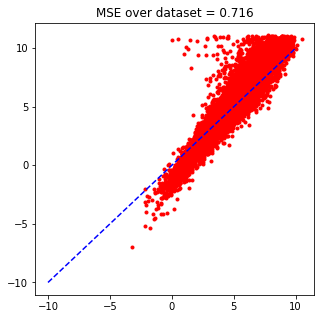

In [17]:
MSE = np.mean((truth-predict)**2)
plt.figure(figsize=(5,5))
plt.scatter(predict, truth, c='r', marker='.')
plt.title(f"MSE over dataset = {MSE:.3f}")
plt.plot([-10, 10], [-10, 10], 'b--')
plt.xlabel('Predicted')
plt.ylabel('Groundtruth')

In [18]:
from scipy.stats import pearsonr
print(pearsonr(predict, truth)[0])

0.9583198178265038


In [28]:
df['PCE-predicted'] = df['PCE']-df['predicted']
filtered = df[(df['PCE'] != 0)]
filtered = filtered.sort_values(by=['PCE-predicted'])

In [29]:
filtered.head()


,smiles,PCE,predicted,PCE-predicted
25210,[nH]1ccc2Cc3c([nH]c4cc(-c5cccc6nsnc56)c5c[nH]c...,-3.699340,0.146256,-3.845596
13998,[nH]1c2C=C(Cc2c2Cc3ccc4=CCC=c4c3-c12)c1scc2[nH...,-6.945400,-3.242761,-3.702639
368,[nH]1ccc2[nH]c3C4=C(Cc3c12)C=C(C4)C1=CC=C[SiH2]1,-4.060552,-0.388856,-3.671696
11979,[nH]1ccc2Cc3c4CC(=Cc4c4=C[SiH2]C=c4c3-c12)c1sc...,-5.326986,-1.762015,-3.564971
17382,C1C=c2c3C=CCc3c3CC(=Cc3c2=C1)c1scc2[nH]ccc12,-4.117414,-0.734299,-3.383115


In [24]:
filtered.tail()

,smiles,PCE,predicted,PCE-predicted
11480,c1sc(-c2cnc(s2)-c2sc(-c3cncc4nsnc34)c3cc[nH]c2...,9.928810,1.287505,8.641305
15301,c1cc2sc3c4[SiH2]C(=Cc4ncc3c2s1)c1cncc2nsnc12,10.063166,1.132066,8.931100
12023,c1cnc(s1)-c1ncc(-c2ccc(cn2)-c2scc3cc[se]c23)c2...,10.722070,1.477757,9.244313
17713,[nH]1c(ccc1-c1scc2[SiH2]ccc12)-c1cnc(s1)-c1cnc...,10.796383,0.456627,10.339756
23096,c1cnc2c(cnc3c4[se]c(cc4c4=C[SiH2]C=c4c23)-c2nc...,10.658349,0.018522,10.639827


In [25]:
len(filtered)

29978

In [27]:
len(filtered)



29157